Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading the model...~
Model loaded successfully.


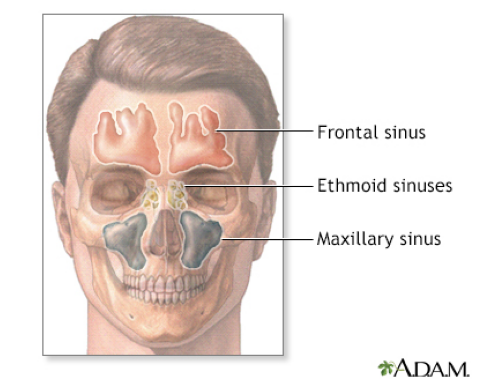

Classifying the test image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Reconstruction Loss: 0.04513460397720337
Prediction: Invalid X-ray or not an X-ray


In [3]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 1  # Grayscale images
THRESHOLD = 0.03  # Replace with the actual threshold value calculated during training
MODEL_PATH = "/content/drive/MyDrive/sinusities/waters_view_autoencoder-optimized.h5"  # Path to your saved model

# Load the saved model
print("Loading the model...~")
autoencoder = load_model(MODEL_PATH, compile=False)
print("Model loaded successfully.")

# Function to preprocess a single image
def preprocess_image(image_path):
    """
    Preprocess a single image for prediction.
    """
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict if the image is valid or invalid
def predict_image(image_path, model, threshold):
    """
    Predict whether an image is valid or invalid based on reconstruction loss.
    """
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Reconstruct the image using the autoencoder
    reconstructed = model.predict(img_array)

    # Calculate the reconstruction loss
    loss = np.mean(np.abs(img_array - reconstructed))
    print(f"Reconstruction Loss: {loss}")

    # Classify based on the threshold
    if loss < threshold:
        return "Valid Waters' view X-ray"
    else:
        return "Invalid X-ray or not an X-ray"

# Main function for testing
def main():

    # Test image path
    test_image_path = "/content/drive/MyDrive/sinusities/test_waters_view/invalid2.jpg"  # Replace with actual test image path

    # Open the image
    image = Image.open(test_image_path).convert("RGB")

    # Show the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

    # Make a prediction
    print("Classifying the test image...")
    result = predict_image(test_image_path, autoencoder, THRESHOLD)
    print(f"Prediction: {result}")

if __name__ == "__main__":
    main()
